**Name:** Shreya Vinay Nayak


**Github Username:** ShreyaNayak256


**USC ID:** 8592810456

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
from astropy.table import QTable, Table, Column
from astropy import units as u
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn import metrics



In [2]:
df= pd.read_csv('../data/column_2C.dat',header=None,sep=' ')
df.head()

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [3]:
df.rename(columns={0: 'pelvic incidence', 1: 'pelvic tilt',2:'lumbar lordosis angle',3:'sacral slope',4:'pelvic radius',5:'grade of spondylolisthesis',6:'Class labels'}, inplace=True)

In [4]:
df.replace({'AB': 1, 'NO': 0},inplace=True)

In [5]:
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class labels
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


## Question b) 

**i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.**

In [7]:
df[['pelvic tilt','lumbar lordosis angle',]]

,pelvic tilt,lumbar lordosis angle
0,22.55,39.61
1,10.06,25.02
2,22.22,50.09
3,24.65,44.31
4,9.65,28.32
...,...,...
305,13.62,36.00
306,20.72,29.22
307,22.69,46.17
308,8.69,41.58


In [8]:
list(df.columns)

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'Class labels']

In [9]:
list(df.columns)[:-1]


['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis']

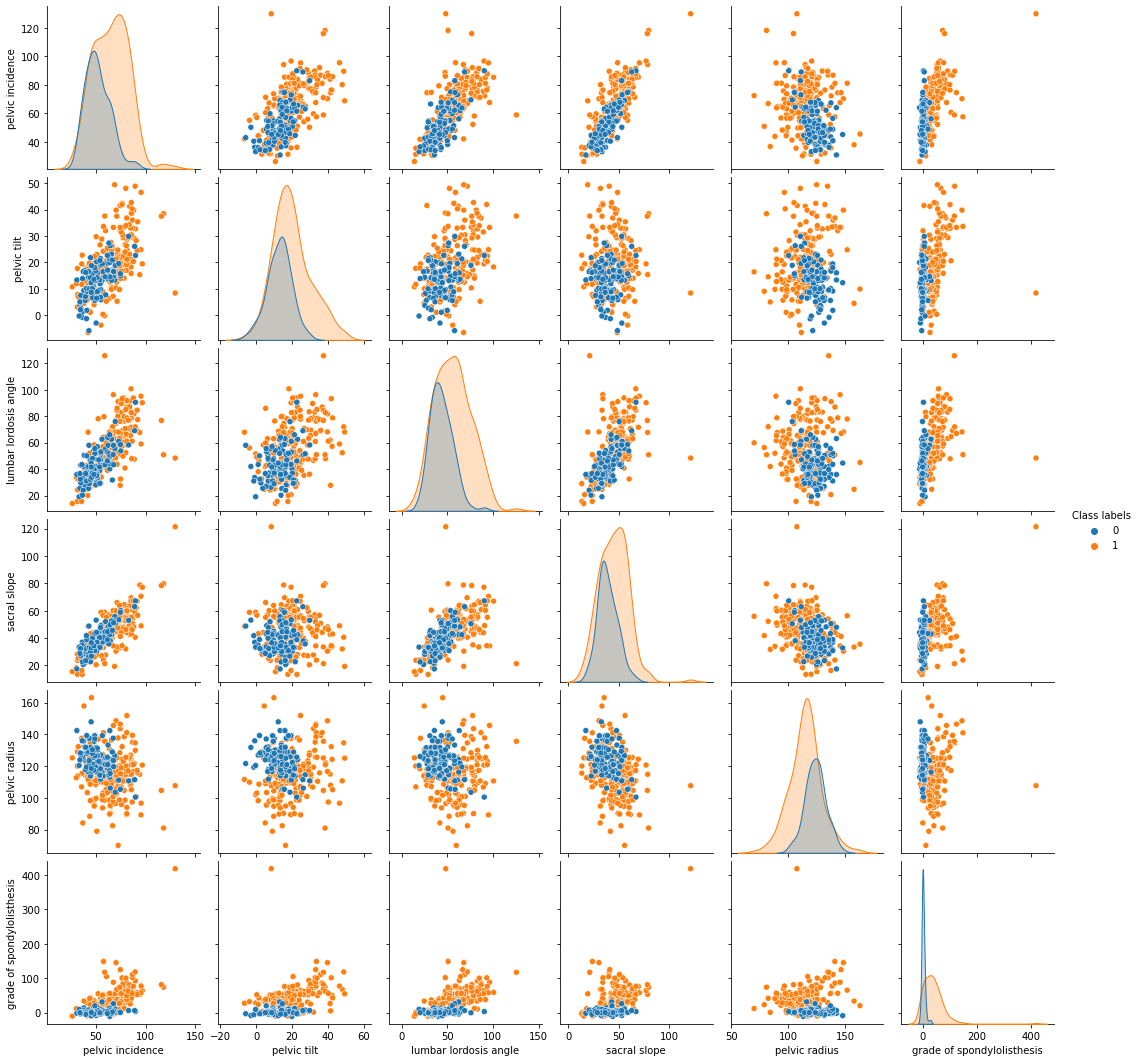

In [10]:
sns.pairplot(df,hue='Class labels')

**ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129)**

<AxesSubplot:xlabel='Class labels', ylabel='pelvic incidence'>

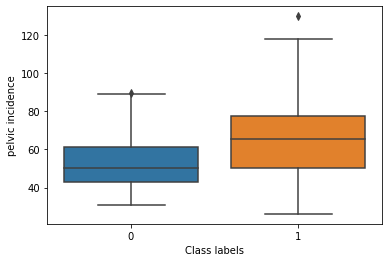

In [11]:
sns.boxplot(data=df,y='pelvic incidence',x='Class labels')

<AxesSubplot:xlabel='Class labels', ylabel='pelvic tilt'>

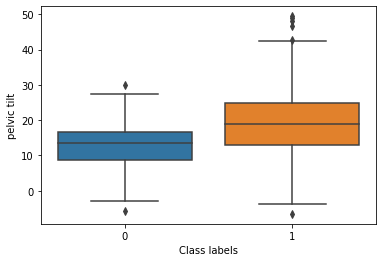

In [12]:
sns.boxplot(data=df,y='pelvic tilt',x='Class labels')

<AxesSubplot:xlabel='Class labels', ylabel='lumbar lordosis angle'>

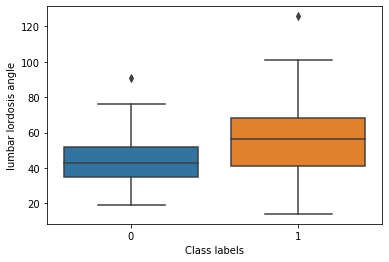

In [13]:
sns.boxplot(data=df,y='lumbar lordosis angle',x='Class labels')

<AxesSubplot:xlabel='Class labels', ylabel='sacral slope'>

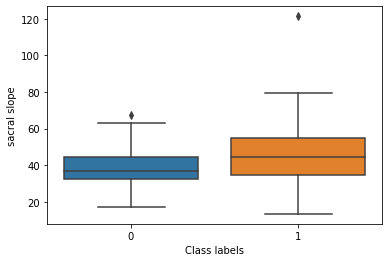

In [14]:
sns.boxplot(data=df,y='sacral slope',x='Class labels')

<AxesSubplot:xlabel='Class labels', ylabel='pelvic radius'>

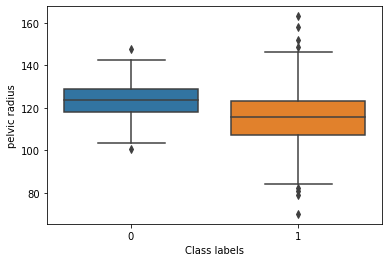

In [15]:
sns.boxplot(data=df,y='pelvic radius',x='Class labels')

<AxesSubplot:xlabel='Class labels', ylabel='grade of spondylolisthesis'>

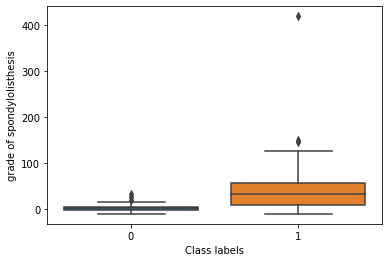

In [16]:
sns.boxplot(data=df,y='grade of spondylolisthesis',x='Class labels')

**iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.**

In [17]:
df_normal= df[df['Class labels']==0]
df_abnormal= df[df['Class labels']==1]

In [18]:
training_set_1=df_normal.iloc[:70]
testing_set_1=df_normal.iloc[70:]

In [19]:
training_set_2=df_abnormal.iloc[:140]
testing_set_2=df_abnormal.iloc[140:]

In [20]:
training_set_1

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class labels
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
275,67.29,16.72,51.00,50.57,137.59,4.96,0
276,51.33,13.63,33.26,37.69,131.31,1.79,0
277,65.76,13.21,44.00,52.55,129.39,-1.98,0
278,40.41,-1.33,30.98,41.74,119.34,-6.17,0


In [21]:
training_set=pd.concat([training_set_1,training_set_2])
testing_set=pd.concat([testing_set_1,testing_set_2])

In [22]:
X_train = training_set[list(training_set.columns)[:-1]]
y_train = training_set['Class labels']
X_test = testing_set[list(testing_set.columns)[:-1]]
y_test=testing_set['Class labels']

In [23]:
len(training_set)

210

In [24]:
len(testing_set)

100

## (c) Classification using KNN on Vertebral Column Data Set


**i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).**

In [25]:
#instantiating the object
model= KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(training_set[list(training_set.columns)[:-1]],training_set['Class labels'])

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [26]:
print(model.predict(X_test))

[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**ii. Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2**

In [27]:
error_rate_test = []
error_rate_train= []

for i in range(208,0,-3):
    
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    error_rate_train.append(np.mean(y_pred_train != y_train))
    error_rate_test.append(np.mean(y_pred_test!= y_test))

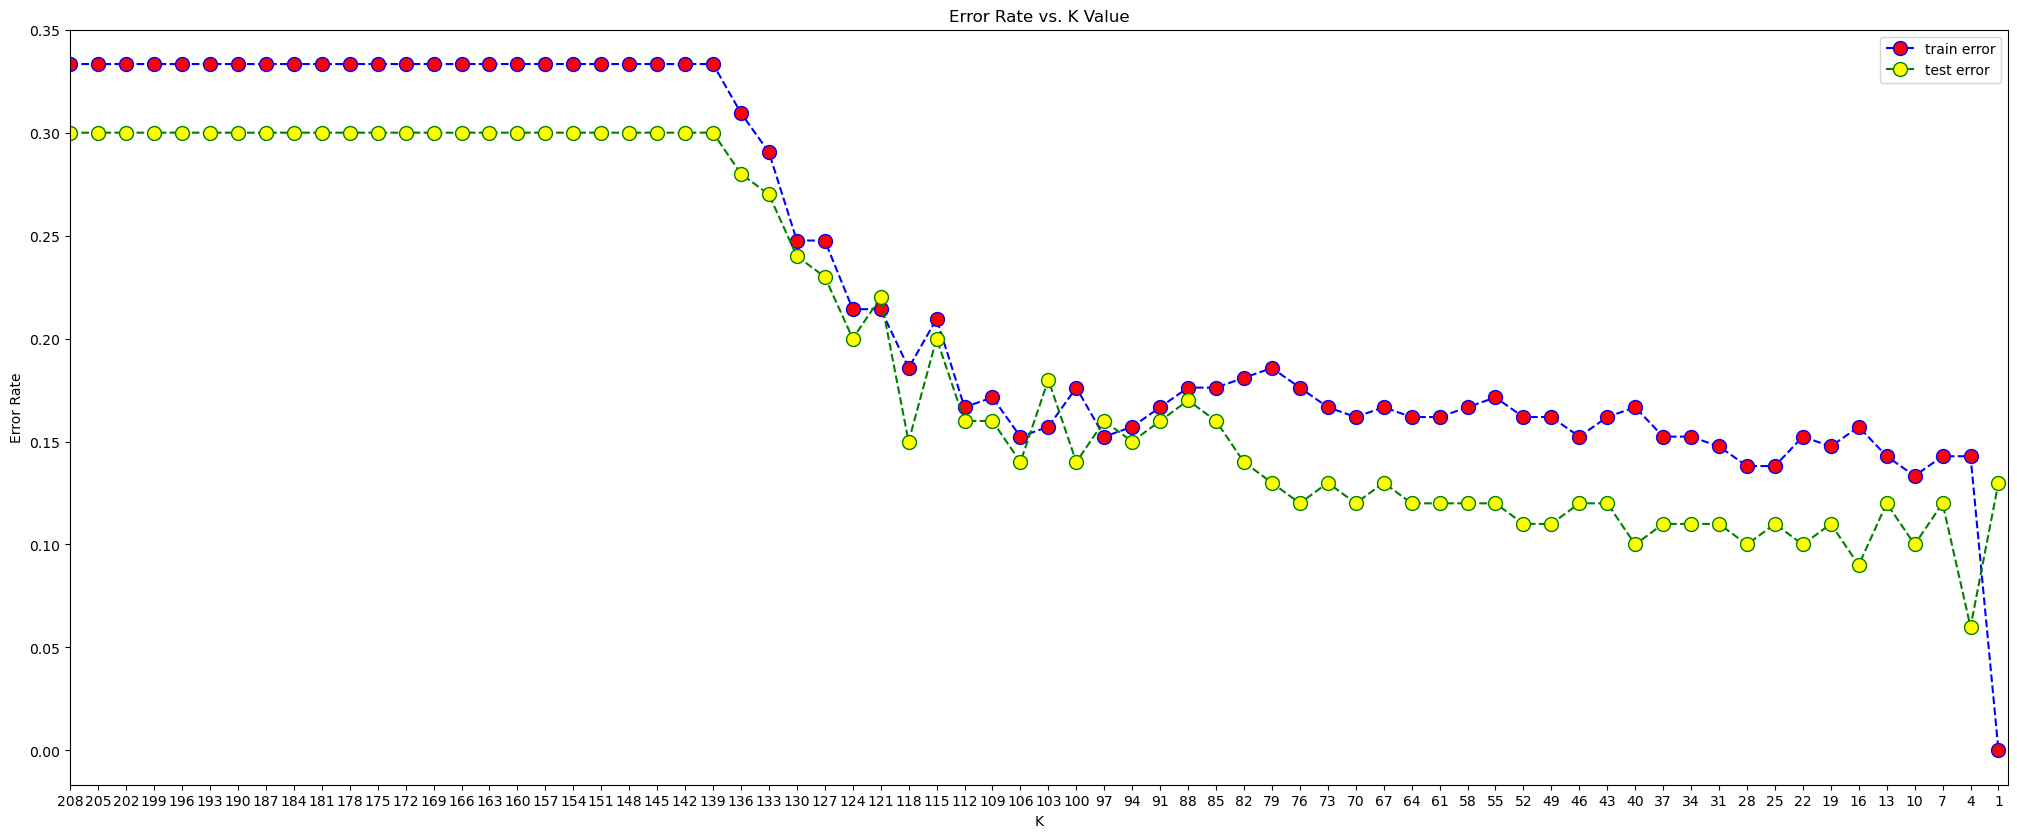

In [28]:
figure(figsize=(25, 10), dpi=100)
plt.plot(range(208,0,-3),error_rate_train,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label = "train error")
plt.plot(range(208,0,-3),error_rate_test,color='green', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10,label= "test error")
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.xlim(208, 0)
plt.xticks(np.arange(208, 0, step=-3))
plt.ylabel('Error Rate')
plt.legend()
plt.show();

In [29]:
least_error=min(error_rate_test)
index=error_rate_test.index(least_error)
print('The most optimal k(k*) is',list(range(208,0,-3))[index])

The most optimal k(k*) is 4


If training error lesser than testing error: it means model is overfitting and has memorized data instead of learning.

If testing error lesser than training error: since model has never seen testing data, this means model has generalized well instead of memorizing which is desired.

At k*=4 the plot seems the best.

In [30]:
model= KNeighborsClassifier(n_neighbors=4, metric='euclidean')
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,predictions)
print(cm)
#The predictions made by model at k*=4 are "predictions" which is compared with "y_test" (the actual label values)

[[25  5]
 [ 1 69]]




The true positive rate (TPR, also called sensitivity) is calculated as TP/TP+FN. TPR is the probability that an actual positive will test positive. The true negative rate (also called specificity), which is the probability that an actual negative will test negative. It is calculated as TN/TN+FP.

In [32]:
TN = cm[0][0]
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TPR= TP/(TP+FN)
TNR=TN/(TN+FP)
Precision_Score= metrics.precision_score(y_test,predictions)
f1_score=metrics.f1_score(y_test,predictions)
print("True positive rate is",TPR)
print("True negative rate is",TNR)
print('Precision score',Precision_Score)
print('F1 score',f1_score)

True positive rate is 0.9857142857142858
True negative rate is 0.8333333333333334
Precision score 0.9324324324324325
F1 score 0.9583333333333333


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



**iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.**

In [34]:
def training_subset(class_0_data, class_1_data,N):
    """
    returns a subset of the training data, as per the size desired
    class_0_data: the dataset having label=0
    class_1_data: the dataset having label=1
    N: size of small dataset desired
    """
    #need N/3 rows of class 0
    data0=class_0_data.iloc[:N//3]
    data1=class_1_data.iloc[:(N-N//3)]
    data = pd.concat([data0,data1])
    return data
    

In [35]:
d1=training_subset(training_set_1,training_set_2,100)

In [36]:
def train_model_error_rate(training_data,testing_data,k=5):
    """
    The function will train on the training data given and return the error rate.
    
    """
    model= KNeighborsClassifier(n_neighbors=k)
    X_train = training_data[list(training_data.columns)[:-1]]
    y_train = training_data['Class labels']
    X_test = testing_data[list(testing_data.columns)[:-1]]
    y_test=testing_data['Class labels']
    model.fit(X_train,y_train)
    y_pred_test= model.predict(X_test)
    error_rate_test=np.mean(y_pred_test!= y_test)
    return(error_rate_test)

In [37]:
def optimal_k(training_data,testing_data,N):
    """
    find the k that has minumum error rate
    returns k as well as the error rate
    """
    error_rate_test = []
    k = list(range(1,N,5))
    for i in k:
        error_rate_test.append(train_model_error_rate(training_data,testing_data,i))
    minimum_error = min(error_rate_test)
    best_k=k[error_rate_test.index(minimum_error)]
    return (best_k,minimum_error)

In [38]:
#Testing the functions
optimal_k(d1,testing_set,100)

(6, 0.25)

In [39]:
#Testing the functions
train_model_error_rate(d1,testing_set)

0.21

In [40]:
def plot_error_rate():
    """
   It will iterate over the different values of N as specified in the range.
   Store all the error rates and their corresponding N in two lists and then plot them.
    
    """
    error_rate_list=[]
    N= list(range(10,211,10))
    for i in range(len(N)):
        tr_s=training_subset(training_set_1,training_set_2,N[i])
        k,min_error = optimal_k(tr_s,testing_set,N[i])
        error_rate_list.append(min_error)
    figure(figsize=(10, 8), dpi=80)
    plt.plot(N,error_rate_list)
    plt.title('Best Test Error Rate vs. Training subset size(N)')
    plt.xlabel('Training subset size(N)')
    plt.xticks(np.arange(10, 211, step=10))
    plt.ylabel('Best Test Error Rate')
    plt.show()

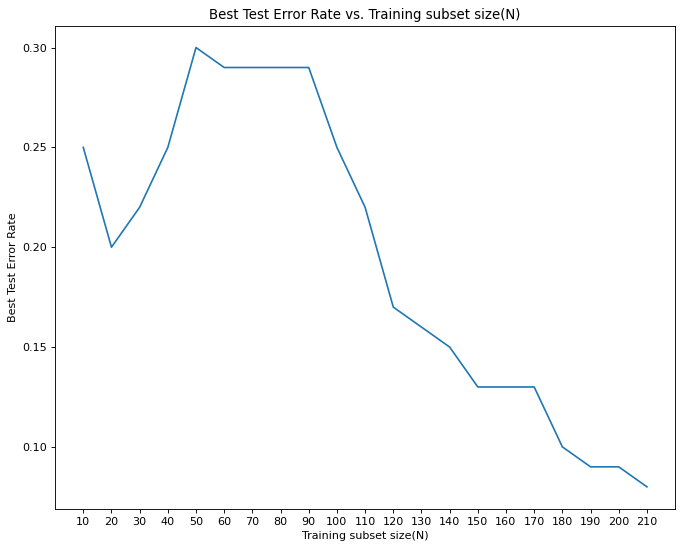

In [41]:
plot_error_rate()

**(d) Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.**


**i. Minkowski Distance:**

**A. which becomes Manhattan Distance with p = 1.**

**B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?**

**C. which becomes Chebyshev Distance with p → ∞**

**ii. Mahalanobis Distance.**



**Question d) i) A.**

In [42]:
def compare_metrics(knn_metric,knn_p=2,*args):
    error_rate_test = []
    error_rate_train= []
    
    for i in range(1,197,5):
        if len(args)>0:
            model= KNeighborsClassifier(n_neighbors=i,metric=knn_metric,p=knn_p,metric_params={"VI":args[0]})
        else:
            model= KNeighborsClassifier(n_neighbors=i,metric=knn_metric,p=knn_p)
        model.fit(X_train,y_train)
        y_pred_train= model.predict(X_train)
        y_pred_test= model.predict(X_test)
        error_rate_train.append(np.mean(y_pred_train != y_train))
        error_rate_test.append(np.mean(y_pred_test != y_test))
    plt.figure(figsize=(10,6))
    plt.plot(range(1,197,5),error_rate_train,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10, label = "train error")
    plt.plot(range(1,197,5),error_rate_test,color='green', linestyle='dashed', marker='o',
             markerfacecolor='yellow', markersize=10,label= "test error")

    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.legend()
    plt.show();
    least_error=min(error_rate_test)
    index=error_rate_test.index(least_error)
    print('The most optimal k(k*) is',list(range(1,197,5))[index])
    print('with test  error: ',least_error)
    return ([list(range(1,197,5))[index],least_error])

**Question d)(i).Minkowski**

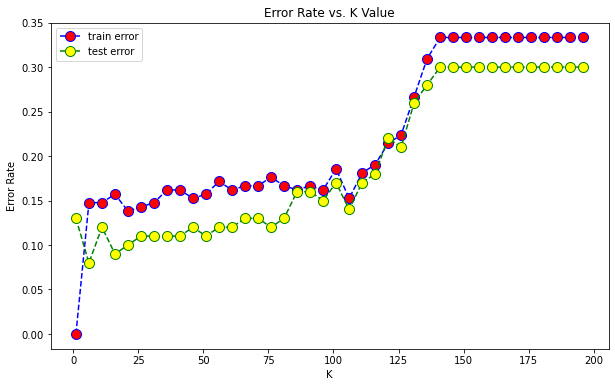

The most optimal k(k*) is 6
with test  error:  0.08


[6, 0.08]

In [43]:
compare_metrics(knn_metric='minkowski',knn_p=2)

**Question d) i) A.**

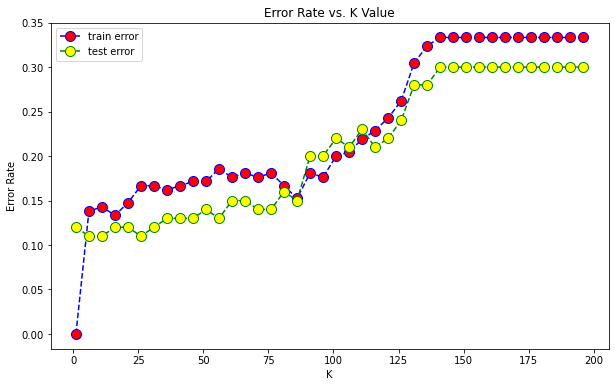

The most optimal k(k*) is 6
with test  error:  0.11


[6, 0.11]

In [44]:
# Manhattan Distance
compare_metrics(knn_metric='minkowski',knn_p=1)

**Question d) i) B.**



In [45]:
values = [10**i for i in np.arange(0.1,1.1,0.1)]
values

[1.2589254117941673,
 1.5848931924611136,
 1.9952623149688797,
 2.51188643150958,
 3.1622776601683795,
 3.9810717055349722,
 5.011872336272724,
 6.309573444801933,
 7.943282347242816,
 10.0]

In [46]:
values = [10**i for i in np.arange(0.1,1.1,0.1)]
errors=[]
for i in values:
    model = KNeighborsClassifier(n_neighbors=6,p=i,metric='minkowski')
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    error_rate = np.mean(pred != y_test)
    errors.append(error_rate)
print("  p      log(p)  error")
for i in range(len(values)):  
    print(values[i].round(4),np.arange(0.1,1.1,0.1).round(4)[i],errors[i].round(4) ,sep = "    ")

  p      log(p)  error
1.2589    0.1    0.09
1.5849    0.2    0.09
1.9953    0.3    0.08
2.5119    0.4    0.08
3.1623    0.5    0.08
3.9811    0.6    0.06
5.0119    0.7    0.07
6.3096    0.8    0.08
7.9433    0.9    0.09
10.0    1.0    0.09


Answer: The best value of log10(p) is at 0.6

**Question d) i) C.**

C. which becomes Chebyshev Distance with p → ∞

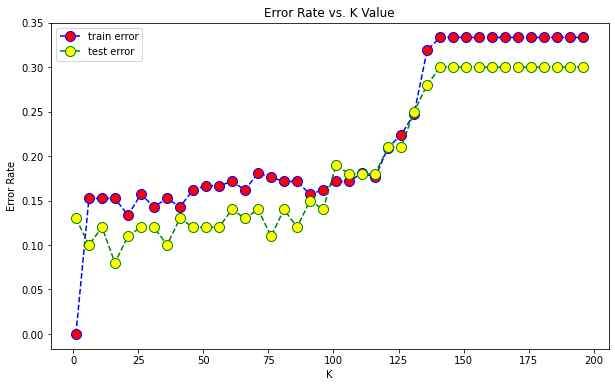

The most optimal k(k*) is 16
with test  error:  0.08


[16, 0.08]

In [47]:
compare_metrics(knn_metric='minkowski',knn_p=math.inf)

ii. Mahalanobis Distance.6


Mahalanobis Distance requires inverting the covariance matrix of the data. When the covariance matrix is singular or ill-conditioned, the data live in a linear subspace of the feature space. In this case, the features have to be transformed into a reduced feature set in the linear subspace, which is equivalent to using a pseudoinverse instead of an inverse.

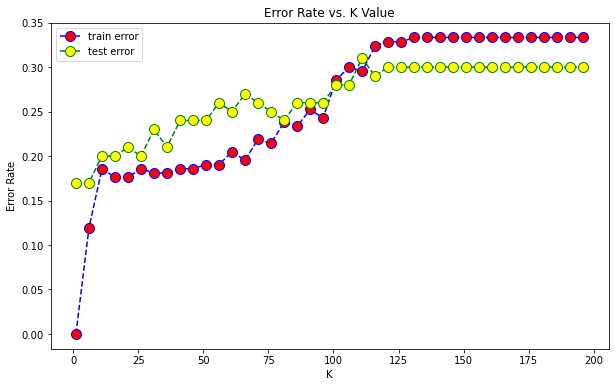

The most optimal k(k*) is 1
with test  error:  0.17


[1, 0.17]

In [48]:
VI=np.linalg.inv(np.cov(X_train,rowvar=False))
compare_metrics('mahalanobis',2,VI)

K=1 is not taken, taking the next best, i.e. k=6

In [49]:
model = KNeighborsClassifier(n_neighbors=6,metric='mahalanobis',metric_params={"VI":VI})
model.fit(X_train,y_train)
y_pred_test= model.predict(X_test)
np.mean(y_pred_test != y_test)

0.17

Although the error is minimal at k=6, the model is overfitting, as it has lesser training accuracy than testing accuracy. At k=101 is where the model is not overfitting(train error< testing error)

Table:
Summarize the test errors (i.e., when k = k∗) in a table. 


In [50]:
table_data = [('Minkowski distance',6,0.08),('Manhattan distance',6 ,0.11),
              ('log10(p)', 0.6,0.06),
              ('Chebyshev distance',16 , 0.08),
              ('Mahalanobis distance',6 ,0.17)]
table = Table(rows=table_data, names=('Distance metric','k*', 'test error'))
print(table)


  Distance metric     k*  test error
-------------------- ---- ----------
  Minkowski distance  6.0       0.08
  Manhattan distance  6.0       0.11
            log10(p)  0.6       0.06
  Chebyshev distance 16.0       0.08
Mahalanobis distance  6.0       0.17


**(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.**






In [51]:
def weighted_decision(d_metric,p1,weight):
    error_rate_test = []

    for i in range(1,197,5):

        model= KNeighborsClassifier(n_neighbors=i,metric= d_metric,p=p1,weights=weight)
        model.fit(X_train,y_train)
        y_pred_test= model.predict(X_test)
        error_rate_test.append(np.mean(y_pred_test != y_test))
    best_error_rate=min(error_rate_test)
    return best_error_rate
    

In [52]:
#Euclidean distance 
# In minkowski when p = 1, this is equivalent to using manhattan_distance, and euclidean_distance for p = 2.
weighted_decision(d_metric='minkowski',p1=2,weight='distance')

0.1

In [53]:
#Manhattan distance
weighted_decision(d_metric='minkowski',p1=1,weight='distance')

0.1

In [54]:
#Chebyshev distance
weighted_decision(d_metric='minkowski',p1=math.inf,weight='distance')


0.11

**(f) What is the lowest training error rate you achieved in this homework?**

In the question Question d) i) A): When K = 1, training error=0.

For K=1, for each data point,x, in our training set, we want to find another neighbouring point, x_neighbour, that has the least distance from x. The shortest possible distance is always 0, which means that the "nearest neighbor" for the datapoint is the original data point itself.

Thus x=x_neighbour

**Answer:** **Lowest training error is 0, at K=1.**


Reference links:
https://www.geeksforgeeks.org/python-seaborn-pairplot-method/

https://www.geeksforgeeks.org/boxplot-using-seaborn-in-python/

https://pandas.pydata.org/docs/user_guide/merging.html

https://machinelearninggeek.com/knn-classification-using-scikit-learn/
https://scikitlearn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

https://datascienceplus.com/k-nearest-neighbors-knn-with-python/

https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html

https://www.biostars.org/p/358046/

https://docs.astropy.org/en/stable/table/construct_table.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics

https://www.machinelearningplus.com/statistics/mahalanobis-distance/

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html



